### 4 задание

In [4]:
import scipy.stats as stats

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
data = np.asarray([49,58,75,110,112,132,151,276,281,362])

In [11]:
m0 = 200

In [13]:
round(stats.wilcoxon(data - m0)[1],4)

0.2845

### 5 задание

In [14]:
X_1 = np.array([22,22,15,13,19,19,18,20,21,13,13,15])

In [15]:
X_2 = np.array([17,18,18,15,12,4,14,15,10])

In [20]:
round(stats.mannwhitneyu(X_2, X_1, alternative = 'less')[1],4)

0.029

### 6 Задание

In [21]:
import pandas as pd

In [122]:
data = pd.read_table("challenger.txt")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [123]:
data.head(2)

,Unnamed: 0,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1


In [137]:
temp_1 = np.asarray(data.loc[data.Incident == 1, 'Temperature'])
temp_0 = np.asarray(data.loc[data.Incident == 0, 'Temperature'])

In [138]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [139]:
n_samples = 1000

In [140]:
np.random.seed(0)
samples_1 = get_bootstrap_samples(temp_1, n_samples)
samples_0 = get_bootstrap_samples(temp_0, n_samples)

In [141]:
samples_0 = samples_0.mean(axis =1)

In [142]:
samples_1 = samples_1.mean(axis =1)

In [143]:
samples_0.shape

(1000,)

In [144]:
from statsmodels.stats.weightstats import zconfint

In [152]:
round(zconfint(samples_0 - samples_1)[0],4)

4.5004

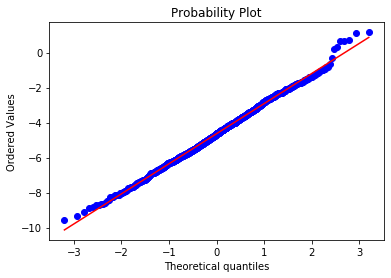

In [133]:
stats.probplot(samples_1 - samples_0, dist = "norm", plot = pylab)
pylab.show()

### 7 задание

In [74]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [105]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for j in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [106]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [107]:
t_stat = permutation_t_stat_ind(temp_1,temp_0)
t_stat

-4.666964285714283

In [108]:
np.random.seed(0)

In [109]:
zero_distr = permutation_zero_dist_ind(temp_1, temp_0, max_combinations = 10000)

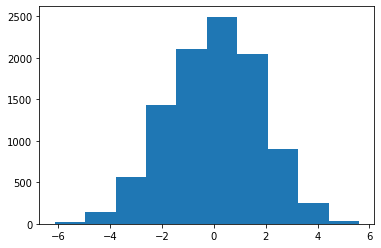

In [111]:
pylab.hist(zero_distr)
pylab.show()

In [113]:
sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)

0.0057